# SEMANA TEC TS1001S Convolucion/Padding


Aqui se ilustra la convolucion. Este tutorial consta de tres pasos.

1. Descargar una imagen
2. Dependencias
3. Aplicar una convolucion



## Descar de Imagen

In [5]:
!gdown https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN


Downloading...
From: https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN
To: /content/sudoku.png
100% 39.4k/39.4k [00:00<00:00, 41.2MB/s]


In [6]:
!ls -ltr

total 44
drwxr-xr-x 1 root root  4096 Mar  9 14:48 sample_data
-rw-r--r-- 1 root root 39407 Mar 24 17:13 sudoku.png


## Dependencias

In [1]:
import matplotlib.pyplot as plt
import numpy
from PIL import Image
from scipy import ndimage

## Convolucion

Aqui se abre y normaliza la imagen

In [7]:
Is = Image.open('sudoku.png');
I = Is.convert('L');
I = numpy.asarray(I);
I = I / 255.0;

Seleccionar los kernels y aplicar la convolucion

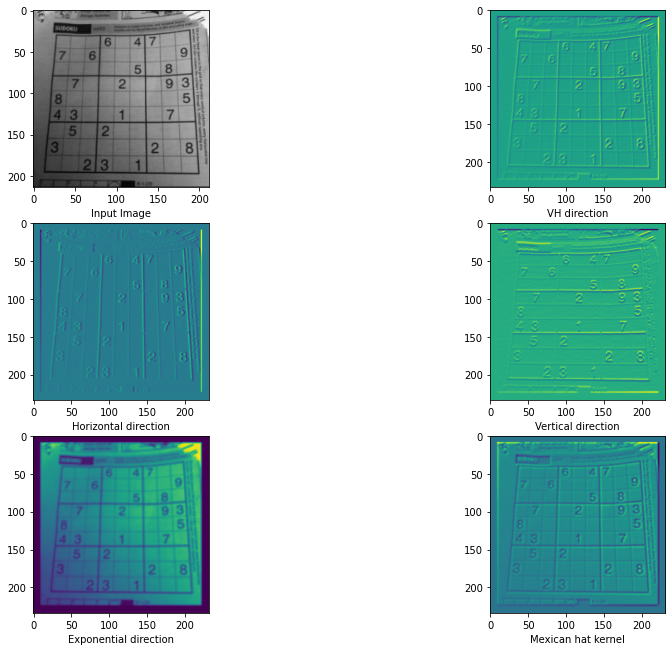

In [28]:
from re import A
k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])

'''
1 -1 1
-1 4 -1
 1 -1 1
'''

k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])

'''
 0 0 0
-1 0 1
 0 0 0
'''


k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

'''
 0 -1 0
 0  0 0
 0  1 0
'''

#Create a exponencial kernel 

def create_k3():

  A= numpy.zeros((3,3))
  for x in range(-1,2):
    for y in range(-1,2):
      A[x,y]= numpy.exp(-1* (((x+y)**2)/2))
  
  return A

#Mexican hat implementation kernel

def mexican_k5(sigma,size):

  A= numpy.zeros((size,size))

  for x in range( -size//2 ,(size // 2)+1):

    for y in range(-size//2 ,(size // 2)+1):

      factor1= (1 / ((numpy.pi)*(sigma ** 4)))

      factor2= (1 -((1/2)*((x** 2 + y ** 2) / (sigma ** 2))))
      
      A[x+1,y+1]= (factor1 * factor2) * numpy.exp(-1 * (((x ** 2 + y ** 2)/ (2 *(sigma ** 2)))))

  return A

def demianKernel():
  k3 = numpy.zeros((3,3))
  for x in range(0,3):
    for y in range(0,3):
      cx=x-1
      cy=y-1
      k3[x,y]=cx*cy
  return k3


J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)
J3 = ndimage.convolve(I, create_k3(), mode='constant', cval=0.0)
J4 = ndimage.convolve(I, mexican_k5(1,5), mode='constant', cval=0.0)
J5 = ndimage.convolve(I, demianKernel(), mode='constant', cval=0.0)

plt.figure(figsize = (15,15))

plt.subplot(4,2,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(4,2,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(4,2,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')


plt.subplot(4,2,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')

plt.subplot(4,2,5)
plt.imshow(J3)
plt.xlabel('Exponential direction')

plt.subplot(4,2,6)
plt.imshow(J4)
plt.xlabel('Mexican hat kernel')

plt.subplot(4,2,7)
plt.imshow(J5)
plt.xlabel('Demian Kernel')

plt.grid(False)
plt.show()

## Padding

In [21]:
Is = Image.open('sudoku.png'); # imagen del sudo
I = Is.convert('L'); # se convierte a escala de grises
I = numpy.asarray(I); # conversion numerica para poder operar de 0-1
I = I / 255.0; # normalizacion 0 - 1

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

I = numpy.pad(I, 10, pad_with, padder=0)

M = kernel(sigma, alpha, I, )

kM = numpy.array(M)

k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])
k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])
k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(3,3,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(3,3,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')

plt.subplot(3,3,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')

plt.subplot(3,3,5)
plt.imshow(J2)
plt.xlabel('Este es reptido Vertical direction')


#plt.grid(False)
plt.show()

NameError: ignored